In [1]:
import pymoo

# Define the Traveling Salesman problem

In [2]:
from motsp import MOTSP
n_obj = 2
problem = MOTSP(100, n_obj) # 100 cities, 2 objectives

# Initialize algorithms

In [3]:
from pymoo.factory import get_sampling, get_crossover, get_mutation

## Initialize NSGA2 algorithm

In [4]:
from pymoo.algorithms.nsga2 import NSGA2
nsga2 = NSGA2(
    pop_size=100,
    n_offsprings=100,
    sampling=get_sampling("perm_random"),
    crossover=get_crossover("perm_erx", prob=0.9),
    mutation=get_mutation("perm_inv"),
)

## Initialize MOEA-D algorithm

In [5]:
from pymoo.algorithms.moead import MOEAD
from pymoo.factory import get_visualization, get_reference_directions
from pymoo.factory import get_sampling, get_crossover, get_mutation

# First, divide our problem in subproblems:
ref_dirs = get_reference_directions("energy", n_obj, 100) # contains weights to define subproblems

moead = MOEAD(
    ref_dirs = ref_dirs,
    n_neighbors=20, # new: n_neighbors is used in the algorithm for reproduction essentially
    decomposition='tchebi', # new: it is the algorithm used to decompose the problem into subproblems
                            #.     the decomposition is based on weights in ref_dirs
    prob_neighbor_mating=.9, # new: the probability to take a solution of a neighbor subproblem in reproduction step
    sampling=get_sampling("perm_random"),
    crossover=get_crossover("perm_erx", prob=.9),
    mutation=get_mutation("perm_inv"),
)

# Run both algorithms

In [6]:
from pymoo.optimize import minimize

In [7]:
res_nsga2 = minimize(problem, nsga2, termination=('n_eval', 10000))

In [8]:
res_moead = minimize(problem, moead, termination=('n_eval', 10000))

# Plot results

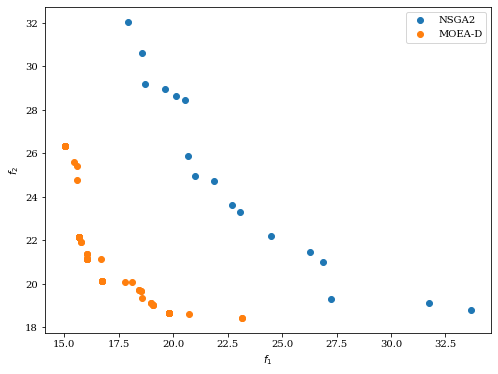

In [9]:
plot = get_visualization('scatter')
plot.add(res_nsga2.F, label='NSGA2')
plot.add(res_moead.F, label='MOEA-D')
plot.legend=True
plot.show()

# Questions

<div class="alert alert-warning">
    <b>Question 1:</b>

What does ref_dirs refers to?
</div>

In [10]:
ref_dirs = get_reference_directions("energy", n_obj, 100) # contains weights to define subproblems

<div class="alert alert-danger"><a href="#hint1" data-toggle="collapse">Hint (click to expand)</a><br>
    <div id="hint1" class="collapse">
        Get its shape, and then try to plot it with matplotlib.pyplot.scatter.
    </div>
</div>

In [11]:
# %load solutions/question1.py


<div class="alert alert-warning">
    <b>Question 2:</b>
    
Do we need to specify pop_size when initializing MOEA-D algorithm? Why?
</div>

In [12]:
# %load solutions/question2.py


<div class="alert alert-warning">
    <b>Question 3:</b>
    
Compare MOEA-D with NSGA-II, given the same termination criterion n_eval = cst.
    
You can also try with <a href="http://pymoo.org/interface/termination.html">other termination criterions</a>.
</div>

In [13]:
# %load solutions/question3.py


<div class="alert alert-warning">
    <b>Question 4:</b>
    
How the results of MOEA-D depend on prob_neihbor_mating parameter? Why?
</div>

In [14]:
# %load solutions/question4.py
